## Observations and Insights 

1.While the gender breakdown was almost 50/50 I wonder if the tests for a specific drug show a similar breakdown of half female and half male specimens.

2.For my mouse(s195) over time his/her tumor size decreased as he continued his dosage of Capomulin shows a positive correlation. I would be interested to see if the other mice that took the same drug showed the same results.

3.One variable we did not focus on is age. In humans ,generally speaking, age does have an impact on the growth of infeaction, speed of groeth, and reaction to medicine.

In [614]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on=("Mouse ID"), how= "outer")

# Display the data table for preview
merged_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [615]:
#mouse_metadata.head()

In [616]:
#study_results.head()

In [617]:
# Checking the number of mice with duplicates
num_mice=merged_df["Mouse ID"].value_counts().count()
num_mice


249

In [618]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mice=merged_df.drop_duplicates(subset= ("Mouse ID","Timepoint"))
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [619]:
# Optional: Get all the data for the duplicate mouse ID. 



In [620]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
num_clean_mice=clean_mice["Mouse ID"].value_counts().count()

# Checking the number of mice in the clean DataFrame.
num_clean_mice

249

## Summary Statistics

In [621]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#pull columns i need
drug_reg_df=clean_mice.loc[:, ["Tumor Volume (mm3)","Drug Regimen"]]
drug_index=drug_reg_df.set_index("Drug Regimen")
#drug_index

In [622]:
# groupby drug regimen

group_drug=drug_index.groupby(["Drug Regimen"])
#group_drug

In [623]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_drug=group_drug["Tumor Volume (mm3)"].mean()
#print(mean_drug)


median_drug=group_drug["Tumor Volume (mm3)"].median()
#print(median_drug)

var_drug=group_drug["Tumor Volume (mm3)"].var()
#print(var_drug)

std_drug=group_drug["Tumor Volume (mm3)"].std()
#print(std_drug)

sem_drug=group_drug["Tumor Volume (mm3)"].sem()
#print(sem_drug)

In [624]:
# Assemble the resulting series into a single summary dataframe.

sum_drug=pd.DataFrame({
        "Mean": mean_drug,
        "Median": median_drug,
        "Varience": var_drug,
        "Standard Deviation": std_drug,
        "SEM": sem_drug
})
sum_drug

,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [625]:
# Using the aggregation method, produce the same summary statistics in a single line-HELP HERE confirm answer?
agg_group_drug= group_drug.agg(["mean","median","std"])
agg_group_drug

Tumor Volume (mm3)                     
                           mean     median       std
Drug Regimen                                        
Capomulin             40.675741  41.557809  4.994774
Ceftamin              52.591172  51.776157  6.268188
Infubinol             52.884795  51.820584  6.567243
Ketapril              55.235638  53.698743  8.279709
Naftisol              54.331565  52.509285  8.134708
Placebo               54.033581  52.288934  7.821003
Propriva              52.393463  50.909965  6.568014
Ramicane              40.216745  40.673236  4.846308
Stelasyn              54.233149  52.431737  7.710419
Zoniferol             53.236507  51.818479  6.966589

## Bar and Pie Charts

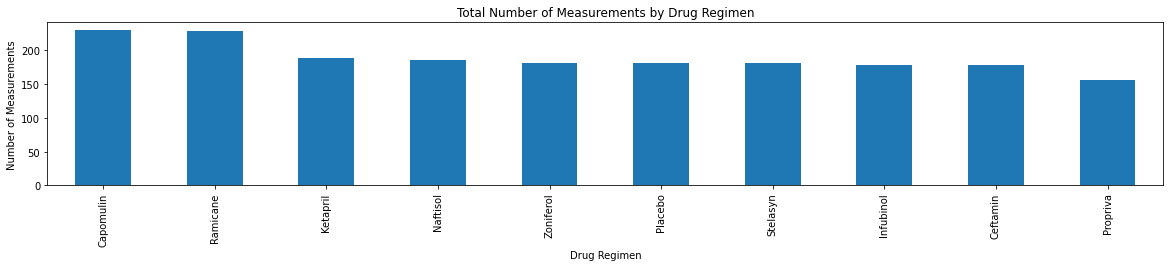

In [626]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#count of how many time it was ran per drug
measurement_drug=clean_mice["Drug Regimen"].value_counts()
measurement_drug_df=pd.DataFrame(measurement_drug)

measurement_pandas=measurement_drug_df["Drug Regimen"]
measurement_pandas

plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

measurement_pandas.plot(kind="bar", figsize=(20,3))
plt.show()


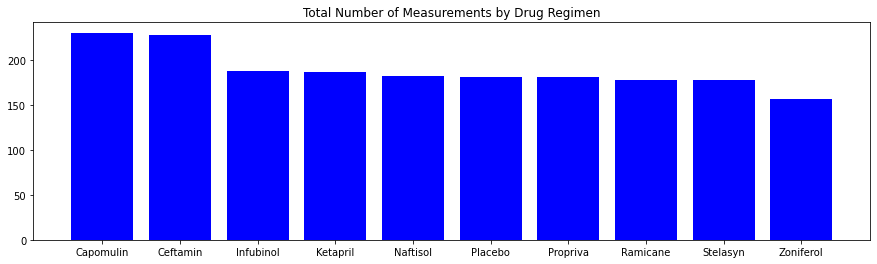

In [627]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#need y-axis will be the count of how many times they meausured each drug

x_axis=list(sum_drug.index)
x_axis

#need y-axis will be the count of how many times they meausured each drug
y_axis=measurement_drug_df["Drug Regimen"].array
y_axis

plt.figure(figsize=(15,4))
plt.bar(x_axis,y_axis, color='b',)
plt.title("Total Number of Measurements by Drug Regimen")
plt.show()


In [628]:
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [629]:
# Generate a pie plot showing the distribution of female versus male mice using pandas  
#helpful resource: https://www.youtube.com/watch?v=0P7QnIQDBJY


gender_mice=merged_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
gender_mice

Male      125
Female    124
Name: Sex, dtype: int64

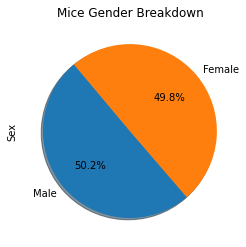

In [630]:
#Setup DF for pandas
gender_mice.plot.pie(y='Gender',autopct="%1.1f%%",title = "Mice Gender Breakdown",startangle=130,shadow=True)
plt.show()

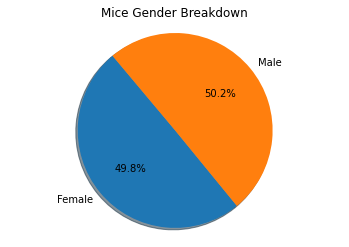

In [631]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
count=[124,125]

plt.title("Mice Gender Breakdown")

plt.pie(count,labels=labels,autopct="%1.1f%%", shadow=True, startangle=130)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [632]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tumor_vol = clean_mice.groupby(["Mouse ID"]).max()
final_tumor_vol = final_tumor_vol.reset_index()
final_tumor_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mice = final_tumor_vol[['Mouse ID','Timepoint']].merge(clean_mice,on=['Mouse ID','Timepoint'],how="left")
merged_mice

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [633]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_regimen

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [634]:

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    end_tumor_vol = merged_mice.loc[merged_mice["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(end_tumor_vol)
    
    # Set upper and lower bounds for outliers
    quartiles = end_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    #interquarteril range
    IQR = upperq-lowerq
    
    #If 1.5 in either direction is a possible outlier
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    
    #print which drug has an outlier and outlier information as it goes through the loop
    print(f"{drug}'s possible outliers: {end_tumor_vol.loc[(end_tumor_vol < lower_bound) | (end_tumor_vol > upper_bound)]}")
    

Capomulin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's possible outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


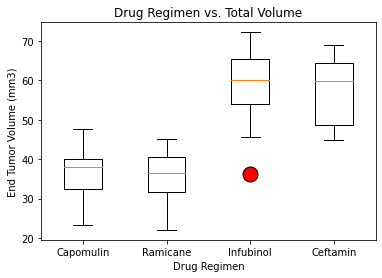

In [635]:
outliers = dict(markerfacecolor='red',markersize=15)
plt.boxplot(tumor_volume_list,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.xlabel('Drug Regimen')
plt.ylabel('End Tumor Volume (mm3)')
plt.title('Drug Regimen vs. Total Volume')
plt.show()

## Correlation and Regression

In [636]:
# Calculate the correlation coefficient and linear regression model


In [637]:
#pull columns I need only for those using the Capomulin drug
mice_corr=clean_mice.loc[clean_mice["Drug Regimen"]=='Capomulin']
mice_corr

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


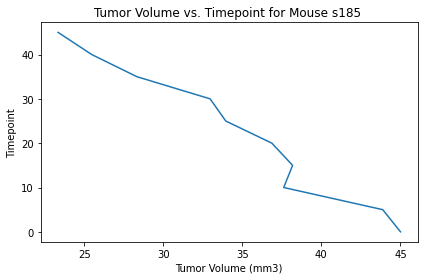

In [638]:
# select one mouse tumor volume  vs timepoint for the Capomulin regimen to put in a line plot

my_mouse=mice_corr[mice_corr["Mouse ID"]=='s185']
my_mouse


x_values=my_mouse['Tumor Volume (mm3)']
y_values=my_mouse['Timepoint']


plt.plot(x_values,y_values)
plt.title("Tumor Volume vs. Timepoint for Mouse s185 ")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.tight_layout()

In [639]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# get avg of tumor volume by mouse

mice_weight_avg = mice_corr.groupby(['Mouse ID']).mean()
mice_weight_avg.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


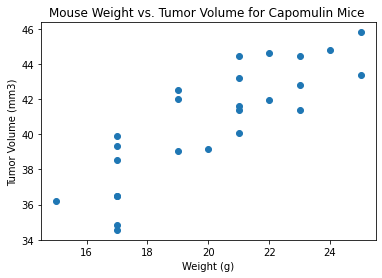

In [640]:
# now plot scatter

x_weight=mice_weight_avg['Weight (g)']
y_vol=mice_weight_avg['Tumor Volume (mm3)']

plt.scatter(x_weight,y_vol)
plt.title("Mouse Weight vs. Tumor Volume for Capomulin Mice ")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 

#Plot the linear regression model on top of the previous scatter plot.


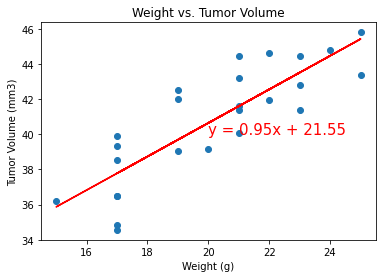

In [641]:
#Add the linear regression equation and line to plot
x_weight=mice_weight_avg['Weight (g)']
y_vol=mice_weight_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_vol)
regress_values = x_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight,y_vol)
plt.plot(x_weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs. Tumor Volume")
plt.show()


In [642]:
correlation=st.pearsonr(x_weight,y_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}.")


The correlation between both factors is 0.84.
